In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import os
cwd = os.getcwd()
cwd

'/data22/bde/Git/Informer2020'

In [2]:
PATH = '/data22/bde/Git/Informer2020'
# NYU-METS-BUS_LINES
#DATA = 'informer_4G_bus_ftMS_sl64_ll32_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

#BerlinV2X
#DATA = 'informer_5G_berlin_ftMS_sl64_ll32_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'
DATA = 'informer_BerlinV2X_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

#ADDIX
#DATA = 'informer_5G_addix_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

UNIVARIATE = True
shift_by = 1
span = 8

In [3]:
metrics = np.load(f'{PATH}/results/{DATA}/metrics.npy')
print(metrics)

[4.6189265e+06 4.0807873e+13 6.3881040e+06 5.9261395e+06]


In [5]:
real_prediction = np.load(f'{PATH}/results/{DATA}/real_prediction.npy')
len(real_prediction)

1

In [8]:
true = np.load(f'{PATH}/results/{DATA}/true.npy')
print(true.shape)
pred = np.load(f'{PATH}/results/{DATA}/pred.npy')
print(pred.shape)

(10528,)
(10528,)


In [9]:
#if UNIVARIATE:
truth = 'Ground Truth'
prediction = 'BandFormer'
df = pd.DataFrame({truth: true.flatten(), prediction: pred.flatten()})

df['Shifted'] = df[truth].shift(shift_by)
df['SMA'] = df[truth].rolling(span).mean()
df['EWMA8'] = df[truth].ewm(span=span, adjust=True).mean()

df.head(20)

,Ground Truth,BandFormer,Shifted,SMA,EWMA8
0,49600000.0,56763524.0,NaN,NaN,4.960000e+07
1,45400000.0,50318204.0,49600000.0,NaN,4.723750e+07
2,56000000.0,51129488.0,45400000.0,NaN,5.091503e+07
3,52600000.0,57932944.0,56000000.0,NaN,5.150558e+07
4,57000000.0,55539364.0,52600000.0,NaN,5.321236e+07
5,55500000.0,63524032.0,57000000.0,NaN,5.386526e+07
6,57800000.0,57406620.0,55500000.0,NaN,5.492152e+07
7,62400000.0,64050100.0,57800000.0,54537500.0,5.684037e+07
8,64700000.0,68010896.0,62400000.0,56425000.0,5.879003e+07
9,62600000.0,66263944.0,64700000.0,58575000.0,5.971133e+07


used true[1:], pred[1:] and shifted[1:]
rmse for true vs pred: 6389067.0, true vs shifted 7557687.0, true vs sma 8380780.802471409, true vs ewm 6913497.400753786
mse for true vs pred: 40820174487552.0, true vs shifted 57118635851776.0, true vs sma 70237486859073.31, true vs ewm 47796446310229.35
mae for true vs pred: 4619225.0, true vs shifted 5024032.0, true vs sma 5644345.118821293, true vs ewm 4710851.097125565


/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated i

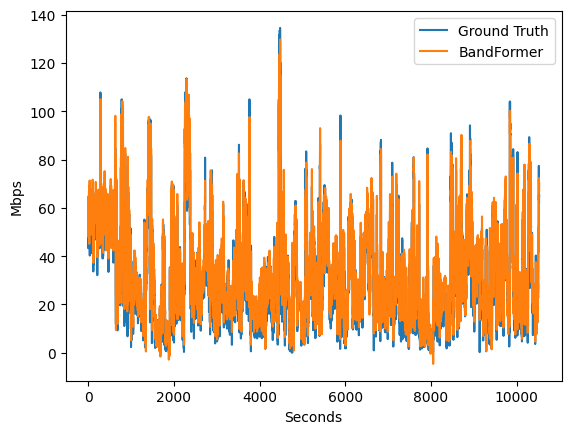

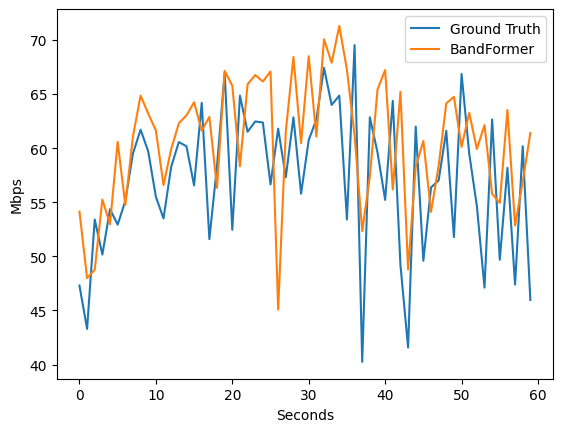

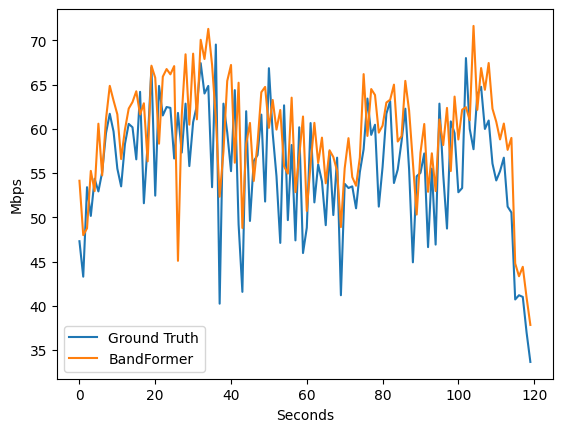

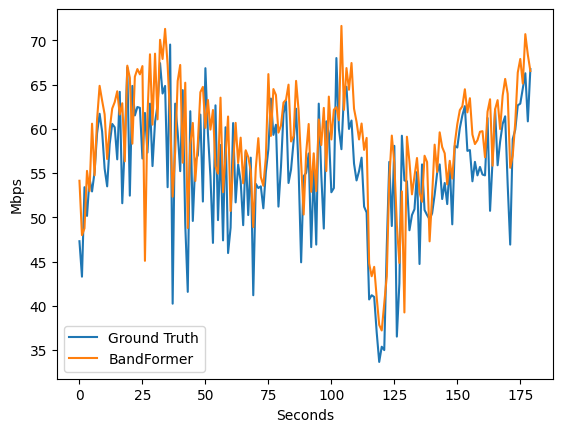

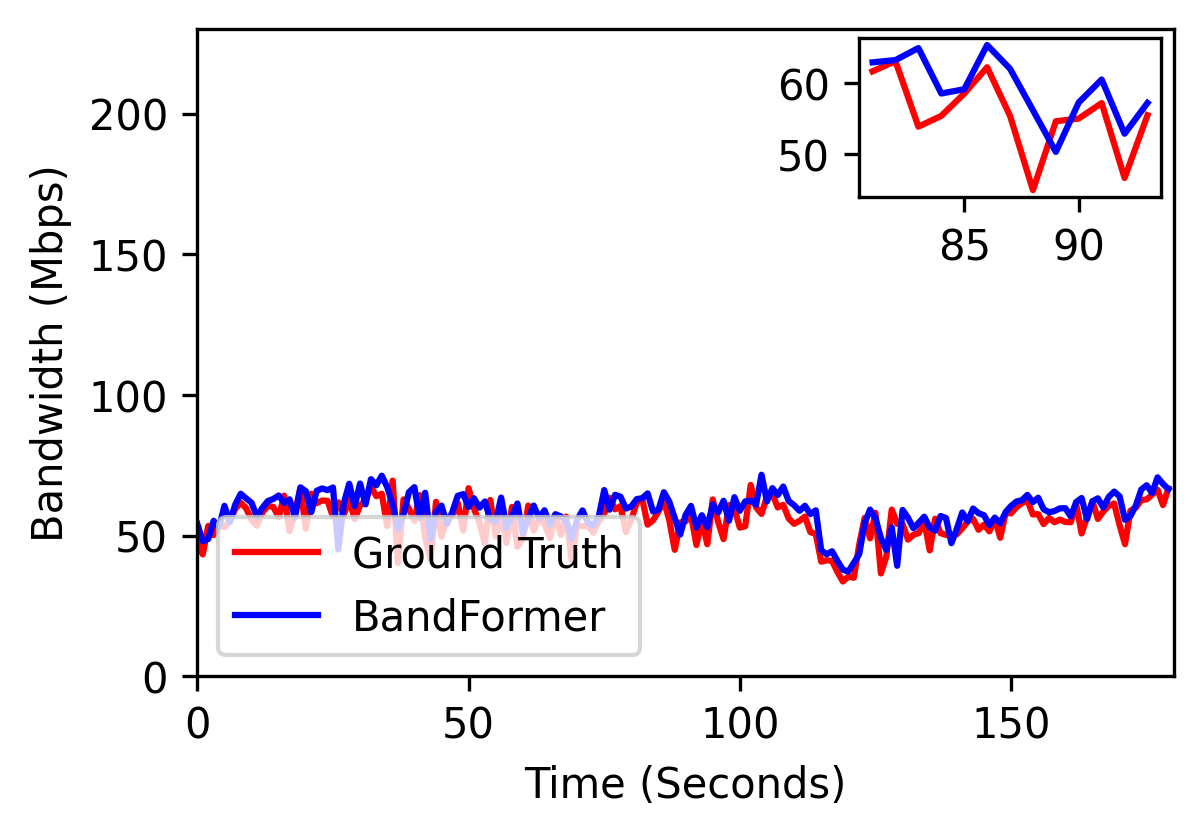

In [10]:
rmse_t_p = mean_squared_error(df[truth][span:], df[prediction][span:], squared=False)
rmse_t_s = mean_squared_error(df[truth][span:], df["Shifted"][span:], squared=False)
rmse_t_sm = mean_squared_error(df[truth][span:], df["SMA"][span:], squared=False)
rmse_t_ewm = mean_squared_error(df[truth][span:], df["EWMA8"][span:], squared=False)

mse_t_p = mean_squared_error(df[truth][span:], df[prediction][span:])
mse_t_s = mean_squared_error(df[truth][span:], df["Shifted"][span:])
mse_t_sm = mean_squared_error(df[truth][span:], df["SMA"][span:])
mse_t_ewm = mean_squared_error(df[truth][span:], df["EWMA8"][span:])

mae_t_p = mean_absolute_error(df[truth][span:], df[prediction][span:])
mae_t_s = mean_absolute_error(df[truth][span:], df["Shifted"][span:])
mae_t_sm = mean_absolute_error(df[truth][span:], df["SMA"][span:])
mae_t_ewm = mean_absolute_error(df[truth][span:], df["EWMA8"][span:])

print('used true[1:], pred[1:] and shifted[1:]')
print(f'rmse for true vs pred: {rmse_t_p}, true vs shifted {rmse_t_s}, true vs sma {rmse_t_sm}, true vs ewm {rmse_t_ewm}')
print(f'mse for true vs pred: {mse_t_p}, true vs shifted {mse_t_s}, true vs sma {mse_t_sm}, true vs ewm {mse_t_ewm}')
print(f'mae for true vs pred: {mae_t_p}, true vs shifted {mae_t_s}, true vs sma {mae_t_sm}, true vs ewm {mae_t_ewm}')

df = df[[truth, prediction]]
df[truth] = df[truth].div(1024*1024)
df[prediction] = df[prediction].div(1024*1024)

ylabel = 'Mbps' #Kbps
""" fig_size = (6, 3)
df.plot(figsize=fig_size) """
df.plot()
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel) #
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.4, 0.4))
plt.savefig(f'plots/{DATA}-full.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-full.png', bbox_inches='tight')

scope = 60
df.head(scope).plot()#figsize=fig_size)
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel)
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.21, 0.4))
plt.savefig(f'plots/{DATA}-{scope}.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-{scope}.png', bbox_inches='tight')

scope2 = scope *2
df.head(scope2).plot()#figsize=fig_size)
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel)
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.21, 0.4))
plt.savefig(f'plots/{DATA}-{scope2}.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-{scope2}.png', bbox_inches='tight')

scope3 = scope *3
df.head(scope3).plot()#figsize=fig_size)
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel)
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.21, 0.4))
plt.savefig(f'plots/{DATA}-{scope3}.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-{scope3}.png', bbox_inches='tight')

fig, ax1 = plt.subplots(figsize=(1.5*2.8, 1*2.8), dpi=300)
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('Bandwidth (Mbps)')
ax1.set_xlim(left=0, right=180)
ax1.set_ylim(bottom=0, top=230)
#plt.xlabel('Seconds')
#plt.ylabel('Bandwidth (Mbps)')
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.65, 0.68, 0.24, 0.19]
ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=80, right=90)
#ax2.set_ylim(bottom=0, top=160)
# Plot
ax1.plot(df[truth][:scope3] , color="red", label=truth)
ax1.plot(df[prediction][:scope3], color="blue", label=prediction)
ax1.legend(loc='lower left')

scope4_s = 81
scope4_e = 94
ax2.plot(df[truth][scope4_s:scope4_e], color="red", label=truth)
ax2.plot(df[prediction][scope4_s:scope4_e], color="blue", label=prediction)
#plt.legend(loc='upper right')
plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.png', bbox_inches='tight')

In [11]:
if not UNIVARIATE:
    df_true = pd.DataFrame.from_records(true)
    df_pred = pd.DataFrame.from_records(pred)
    df_shifted = df_true.shift(shift_by)

    print(f'used df_true[{shift_by}:], df_pred[{shift_by}:] and shifted[{shift_by}:]')
    print(f'rmse for true vs pred: {mean_squared_error(df_true[shift_by:], df_pred[shift_by:], squared=False)}, true vs shifted {mean_squared_error(df_true[shift_by:], df_shifted[shift_by:], squared=False)}')
    print(f'mae for true vs pred: {mean_absolute_error(df_true[shift_by:], df_pred[shift_by:])}, true vs shifted {mean_absolute_error(df_true[shift_by:], df_shifted[shift_by:])}')
    print(f'mse for true vs pred: {mean_squared_error(df_true[shift_by:], df_pred[shift_by:])}, true vs shifted {mean_squared_error(df_true[shift_by:], df_shifted[shift_by:])}')

    #plt.figure(figsize=(16, 8), dpi=150)

    #df_true_0.plot(subplots=True, label='true')
    #df_pred_0.plot(subplots=True, label='pred')

    #plt.title('Informer Multivariate')
    # adding Label to the x-axis
    #plt.xlabel('Years')
    # adding legend to the curve
    #plt.legend()